In [6]:
import tensorflow as tf

from tensorflow.keras import layers, Model

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [5]:
class Denoise(Model):
  def __init__(self):
    super(Denoise, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(28, 28, 1)), 
      layers.Conv2D(16, (3,3), activation='relu', padding='same', strides=2),
      layers.Conv2D(8, (3,3), activation='relu', padding='same', strides=2)])

    self.decoder = tf.keras.Sequential([
      layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2D(1, kernel_size=(3,3), activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

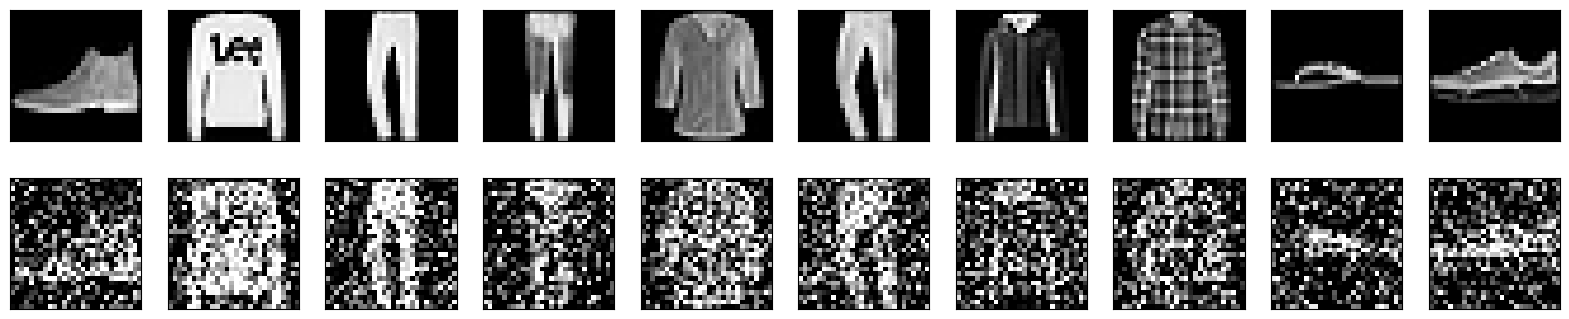

In [7]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

# Fashion MNIST 데이터셋 불러오기
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# 데이터 전처리 (정규화)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 데이터에 가우시안 노이즈 추가
noise_factor = 0.5  # 노이즈의 강도 조절
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# 노이즈가 있는 데이터를 0과 1 사이로 클리핑
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# 시각화: 원본 이미지와 노이즈가 있는 이미지 비교
n = 10  # 몇 개의 이미지를 시각화할 것인지 결정
plt.figure(figsize=(20, 4))

for i in range(n):
    # 원본 이미지
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 노이즈가 있는 이미지
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [11]:
autoencoder = Denoise()
autoencoder.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError())
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0281 - val_loss: 0.0214
Epoch 2/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0208 - val_loss: 0.0204
Epoch 3/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0199 - val_loss: 0.0198
Epoch 4/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0194 - val_loss: 0.0194
Epoch 5/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0191 - val_loss: 0.0193
Epoch 6/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0188 - val_loss: 0.0188
Epoch 7/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0186 - val_loss: 0.0187
Epoch 8/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0185 - val_loss: 0.0185
Epoch 9/10
1875/1875 [==============================] - 37s 19ms/step - loss: 0.0184 - val_loss: 0.0185
Epoch 10/10
1875/1875 [==============================] - 36s 19m

313/313 [==============================] - 2s 7ms/step


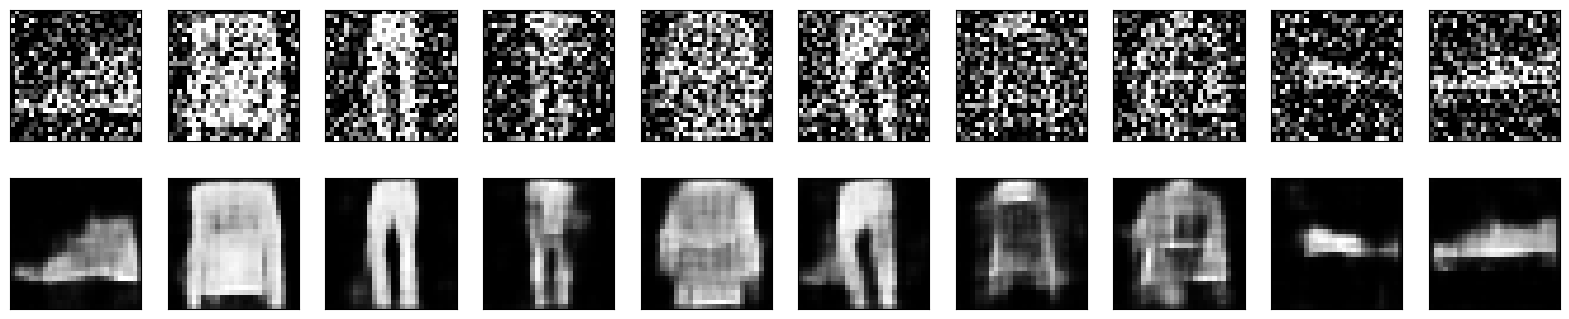

In [12]:
decoded_images = autoencoder.predict(x_test_noisy)

# 결과 시각화
n = 10  # 시각화할 이미지 개수
plt.figure(figsize=(20, 4))

for i in range(n):
    # 노이즈가 있는 이미지
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 모델에 의해 재구성된 이미지
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()
